<a href="https://colab.research.google.com/github/anasshamoon12002/data-mining-2023-24/blob/main/Clustering_Density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Project, a.y. 2023-2024
## Salvatore Correnti, Jonathan Ato Markin, Anas Shamoon
## Density-Based Clustering Notebook

# Preliminary
These cells are for running the notebook with `Google Colab` using a `Google Drive` storage for the project repository. They can be skipped if data is available locally.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "drive/MyDrive/Colab Notebooks/data-mining-2023-24"

/content/drive/MyDrive/Colab Notebooks/data-mining-2023-24


# Density-Based Clustering

## Preliminary

In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from itertools import product
from datetime import datetime

In [4]:
df_clustering_dbscan = pd.read_csv('data/df_incidents_poverty_house_data_preparation_final.csv')

### Dataset Cleaning and Selection

In [5]:
df_clustering_dbscan['state'].value_counts()

Illinois         10342
Florida           7034
California        6467
Ohio              5181
Texas             4966
Georgia           4373
Pennsylvania      4323
Louisiana         4015
Tennessee         3618
Missouri          3555
Maryland          3253
Massachusetts     3168
Indiana           2875
Wisconsin         2795
Michigan          2696
Virginia          2618
Alabama           2525
Kentucky          2007
Connecticut       1833
Mississippi       1771
Arkansas          1568
Colorado          1509
Washington        1460
Iowa              1428
Oregon            1284
Kansas            1122
Oklahoma          1020
Arizona            837
Nevada             821
Nebraska           700
Minnesota          689
Maine              521
Utah               385
Idaho              259
Vermont            189
Delaware           126
Alaska              15
Name: state, dtype: int64

In [6]:
df_clustering_dbscan_alabama = df_clustering_dbscan[df_clustering_dbscan['state'] == 'Alabama'].drop(columns=['state', 'state_congressional_district'])

In [7]:
df_clustering_dbscan_alabama.head()

,latitude,longitude,avg_age_participants,males_ratio,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio
38,30.6432,-87.9076,19.0,1.0,14.7,0.0,0.000000,0.0,0.963825,0.044444,0.0,0.000,0.0
145,30.6702,-88.2254,24.0,1.0,14.7,0.0,0.000000,0.0,0.963825,0.022222,0.0,0.000,0.0
198,34.7442,-86.5912,36.0,0.0,15.8,0.0,0.000000,0.0,0.744241,0.000000,0.0,0.000,0.0
200,32.6208,-85.4922,36.0,1.0,16.8,0.0,0.500000,0.5,0.661205,0.086957,0.0,0.125,0.2
315,32.8708,-85.2010,25.0,1.0,14.7,0.0,0.333333,0.0,0.669318,0.142857,0.0,0.200,0.0


As for KMeans, we will compare the results with `StandardScaler` and `MinMaxScaler`.

In [8]:
# Standardize the features
std_scaler, min_max_scaler = StandardScaler(), MinMaxScaler()
df_dbscan_std_scaled = std_scaler.fit_transform(df_clustering_dbscan_alabama)
df_dbscan_min_max_scaled = min_max_scaler.fit_transform(df_clustering_dbscan_alabama)

In [9]:
df_dbscan_normal = df_clustering_dbscan_alabama.to_numpy()

## DBScan without scaling

In [10]:
S = np.sqrt(np.sum(np.square(df_dbscan_normal), axis=1))
print(S, S.min(), S.max(), S.sum()/len(S), sep='\n')

[ 96.15494151  97.56229715 101.24914442 ...  95.57750159 103.44963267
  95.94726592]
93.41228704901457
115.89776245989383
99.87483367253938


In [11]:
eps_values = np.array([1, 2, 4, 6, 8, 10])  # eps values to be investigated (18 combinations)
min_samples = np.arange(5, 21, 5)  # min_samples values to be investigated (5 combinations)

DBSCAN_params = list(product(eps_values, min_samples))
len(DBSCAN_params)

24

In [12]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
  print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Starting DBScan with p = {p}")
  DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_dbscan_normal)
  no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
  if no_of_clusters[-1] > 1:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got {no_of_clusters[-1]} clusters. Starting to calculate silhouette_score with p = {p}")
    sil_score.append(silhouette_score(df_dbscan_normal, DBS_clustering.labels_))
  else:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got a single cluster, setting silhouette to None with p = {p}")
    sil_score.append(None)

[26-12-2023 15:52:37] Starting DBScan with p = (1, 5)
[26-12-2023 15:52:37] Got 95 clusters. Starting to calculate silhouette_score with p = (1, 5)
[26-12-2023 15:52:37] Starting DBScan with p = (1, 10)
[26-12-2023 15:52:37] Got 23 clusters. Starting to calculate silhouette_score with p = (1, 10)
[26-12-2023 15:52:37] Starting DBScan with p = (1, 15)
[26-12-2023 15:52:38] Got 12 clusters. Starting to calculate silhouette_score with p = (1, 15)
[26-12-2023 15:52:38] Starting DBScan with p = (1, 20)
[26-12-2023 15:52:38] Got 3 clusters. Starting to calculate silhouette_score with p = (1, 20)
[26-12-2023 15:52:38] Starting DBScan with p = (2, 5)
[26-12-2023 15:52:38] Got 2 clusters. Starting to calculate silhouette_score with p = (2, 5)
[26-12-2023 15:52:38] Starting DBScan with p = (2, 10)
[26-12-2023 15:52:38] Got 3 clusters. Starting to calculate silhouette_score with p = (2, 10)
[26-12-2023 15:52:38] Starting DBScan with p = (2, 15)
[26-12-2023 15:52:38] Got 2 clusters. Starting to ca

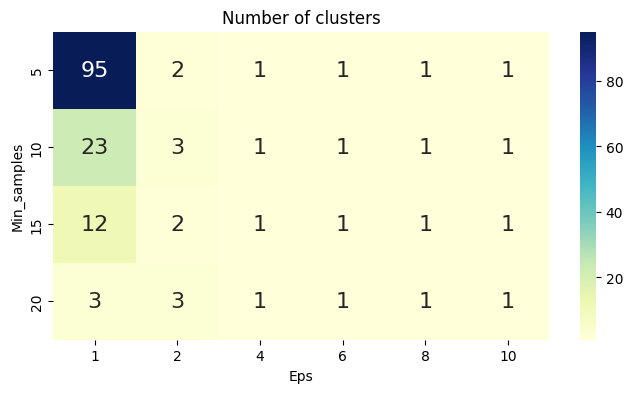

In [13]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(8,4))
sn.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

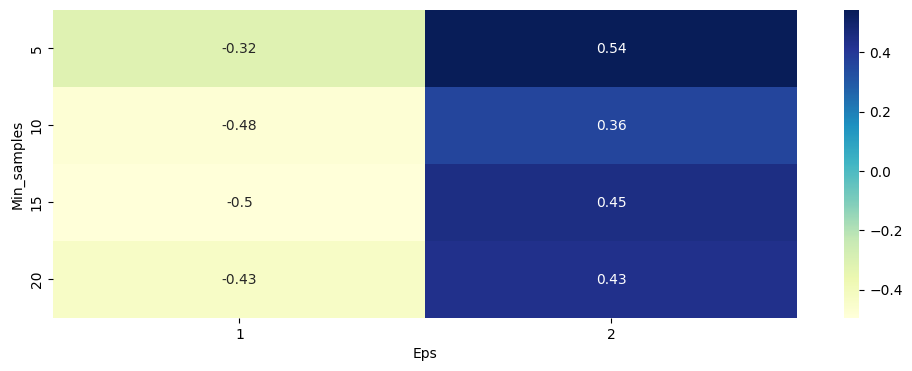

In [14]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,4))
sn.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

As we can see, if we exclude the cases with $2$ clusters (which mean a single cluster and outliers) and the cases with more than $10$ clusters, global maximum is $0.43$ with $min\_samples = 20, eps = 2.0$ and $3$ clusters (including outliers).

In [15]:
DBS_clustering = DBSCAN(eps=2, min_samples=20).fit(df_dbscan_normal)

df_dbscan_alabama_normal_clustered = df_clustering_dbscan_alabama.copy()
df_dbscan_alabama_normal_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [16]:
df_dbscan_alabama_normal_clustered['Cluster'].value_counts()

 0    2411
-1      84
 1      30
Name: Cluster, dtype: int64

In [17]:
df_dbscan_alabama_normal_clustered.head()

,latitude,longitude,avg_age_participants,males_ratio,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio,Cluster
38,30.6432,-87.9076,19.0,1.0,14.7,0.0,0.000000,0.0,0.963825,0.044444,0.0,0.000,0.0,0
145,30.6702,-88.2254,24.0,1.0,14.7,0.0,0.000000,0.0,0.963825,0.022222,0.0,0.000,0.0,0
198,34.7442,-86.5912,36.0,0.0,15.8,0.0,0.000000,0.0,0.744241,0.000000,0.0,0.000,0.0,0
200,32.6208,-85.4922,36.0,1.0,16.8,0.0,0.500000,0.5,0.661205,0.086957,0.0,0.125,0.2,0
315,32.8708,-85.2010,25.0,1.0,14.7,0.0,0.333333,0.0,0.669318,0.142857,0.0,0.200,0.0,0


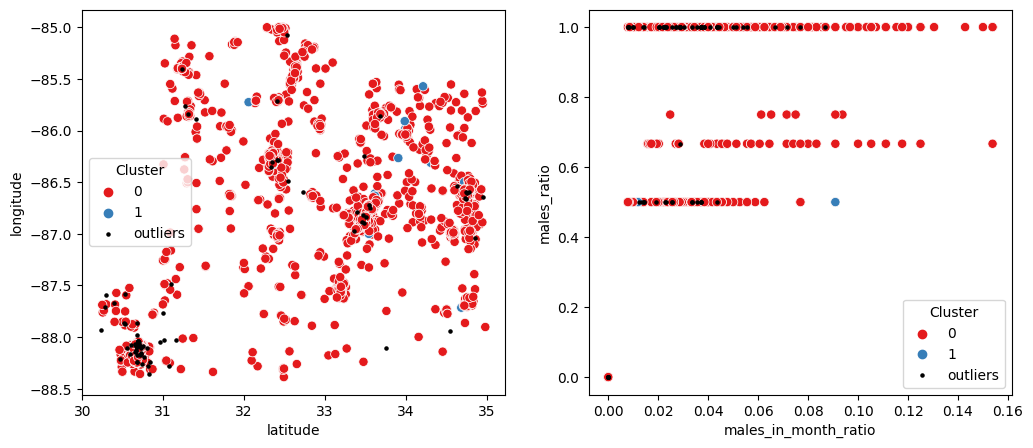

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

outliers = df_dbscan_alabama_normal_clustered[df_dbscan_alabama_normal_clustered['Cluster'] == -1]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='latitude', y='longitude',
                data=df_dbscan_alabama_normal_clustered[df_dbscan_alabama_normal_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='males_in_month_ratio', y='males_ratio',
                data=df_dbscan_alabama_normal_clustered[df_dbscan_alabama_normal_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['latitude'], outliers['longitude'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['males_in_month_ratio'], outliers['males_ratio'], s=5, label='outliers', c="k")

for ax in axes:
    ax.legend()
    ax.get_legend().set_title('Cluster')

plt.show()


## DBScan with StandardScaler

In [19]:
S = np.sqrt(np.sum(np.square(df_dbscan_std_scaled), axis=1))
print(S, S.min(), S.max(), S.sum()/len(S), sep='\n')

[3.3760461  3.37156075 3.21590669 ... 2.90456211 2.46243139 2.35951498]
1.418999872523071
8.879979613745375
3.468297838305408


In [20]:
eps_values = np.array([0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])  # eps values to be investigated (18 combinations)
min_samples = np.arange(5, 41, 5)  # min_samples values to be investigated (5 combinations)

DBSCAN_params = list(product(eps_values, min_samples))
len(DBSCAN_params)

104

In [21]:
no_of_clusters_std_scaler = []
sil_score_std_scaler = []

for p in DBSCAN_params:
  print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Starting DBScan with p = {p}")
  DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_dbscan_std_scaled)
  no_of_clusters_std_scaler.append(len(np.unique(DBS_clustering.labels_)))
  if no_of_clusters_std_scaler[-1] > 1:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got {no_of_clusters_std_scaler[-1]} clusters. Starting to calculate silhouette_score with p = {p}")
    sil_score_std_scaler.append(silhouette_score(df_dbscan_std_scaled, DBS_clustering.labels_))
  else:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got a single cluster, setting silhouette to None with p = {p}")
    sil_score_std_scaler.append(None)

[26-12-2023 15:52:42] Starting DBScan with p = (0.8, 5)
[26-12-2023 15:52:43] Got 65 clusters. Starting to calculate silhouette_score with p = (0.8, 5)
[26-12-2023 15:52:43] Starting DBScan with p = (0.8, 10)
[26-12-2023 15:52:43] Got 23 clusters. Starting to calculate silhouette_score with p = (0.8, 10)
[26-12-2023 15:52:43] Starting DBScan with p = (0.8, 15)
[26-12-2023 15:52:43] Got 13 clusters. Starting to calculate silhouette_score with p = (0.8, 15)
[26-12-2023 15:52:43] Starting DBScan with p = (0.8, 20)
[26-12-2023 15:52:44] Got 9 clusters. Starting to calculate silhouette_score with p = (0.8, 20)
[26-12-2023 15:52:44] Starting DBScan with p = (0.8, 25)
[26-12-2023 15:52:44] Got 7 clusters. Starting to calculate silhouette_score with p = (0.8, 25)
[26-12-2023 15:52:44] Starting DBScan with p = (0.8, 30)
[26-12-2023 15:52:44] Got 5 clusters. Starting to calculate silhouette_score with p = (0.8, 30)
[26-12-2023 15:52:45] Starting DBScan with p = (0.8, 35)
[26-12-2023 15:52:45] Go

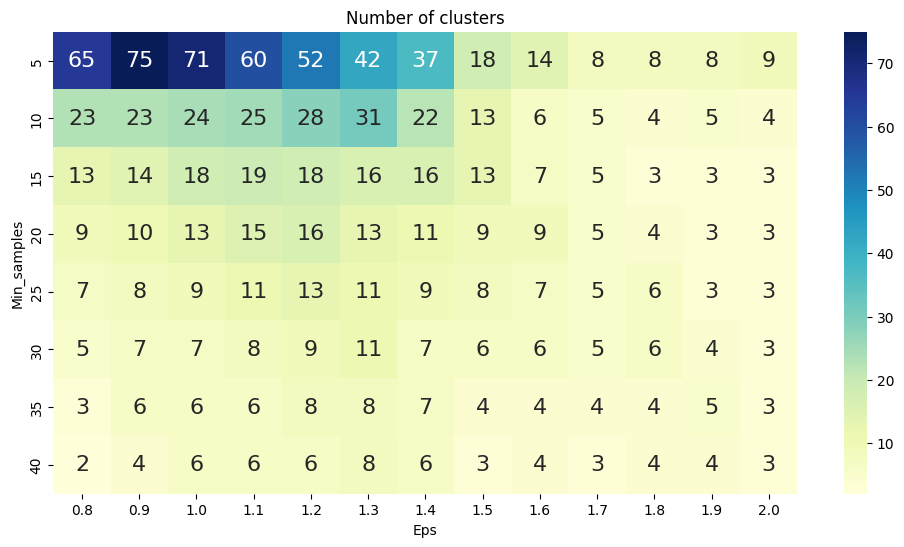

In [22]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters_std_scaler

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sn.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

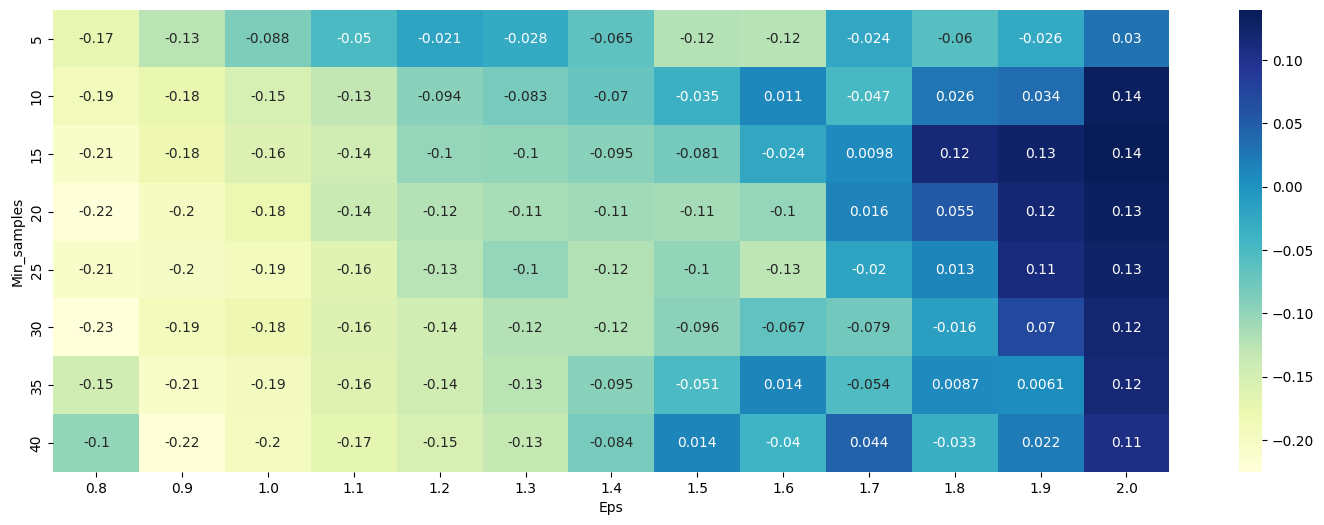

In [23]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score_std_scaler

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sn.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

As we can see, global maximum is $0.145$ with $min\_samples \in \{15, 20\}, eps = 2.0$ and $4$ or $3$ clusters (including outliers).

In [52]:
DBS_clustering = DBSCAN(eps=2.0, min_samples=15).fit(df_dbscan_std_scaled)

df_dbscan_alabama_std_clustered = df_clustering_dbscan_alabama.copy()
df_dbscan_alabama_std_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [53]:
df_dbscan_alabama_std_clustered['Cluster'].value_counts()

 0    2063
-1     330
 1     132
Name: Cluster, dtype: int64

In [54]:
df_dbscan_alabama_std_clustered.head()

,latitude,longitude,avg_age_participants,males_ratio,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio,Cluster
38,30.6432,-87.9076,19.0,1.0,14.7,0.0,0.000000,0.0,0.963825,0.044444,0.0,0.000,0.0,0
145,30.6702,-88.2254,24.0,1.0,14.7,0.0,0.000000,0.0,0.963825,0.022222,0.0,0.000,0.0,0
198,34.7442,-86.5912,36.0,0.0,15.8,0.0,0.000000,0.0,0.744241,0.000000,0.0,0.000,0.0,0
200,32.6208,-85.4922,36.0,1.0,16.8,0.0,0.500000,0.5,0.661205,0.086957,0.0,0.125,0.2,-1
315,32.8708,-85.2010,25.0,1.0,14.7,0.0,0.333333,0.0,0.669318,0.142857,0.0,0.200,0.0,-1


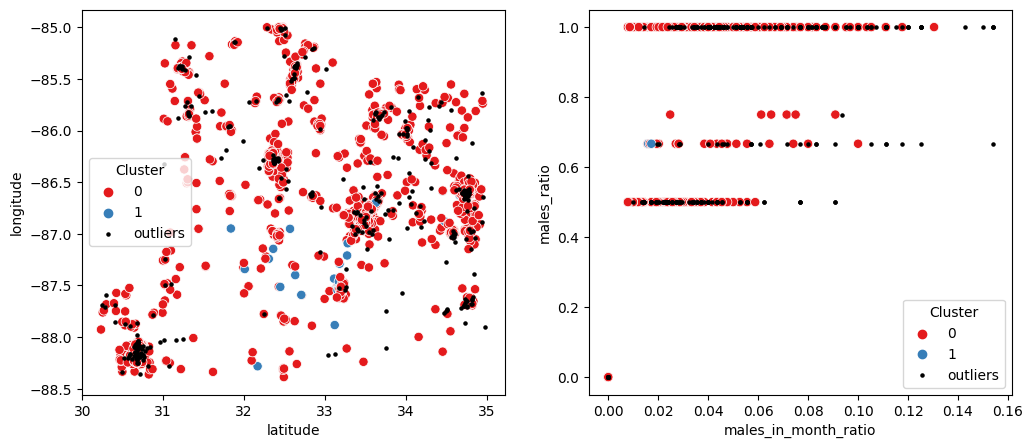

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

outliers = df_dbscan_alabama_std_clustered[df_dbscan_alabama_std_clustered['Cluster'] == -1]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='latitude', y='longitude',
                data=df_dbscan_alabama_std_clustered[df_dbscan_alabama_std_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='males_in_month_ratio', y='males_ratio',
                data=df_dbscan_alabama_std_clustered[df_dbscan_alabama_std_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['latitude'], outliers['longitude'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['males_in_month_ratio'], outliers['males_ratio'], s=5, label='outliers', c="k")

for ax in axes:
    ax.legend()
    ax.get_legend().set_title('Cluster')

plt.show()

## DBScan with MinMaxScaler

In [56]:
S = np.sqrt(np.sum(np.square(df_dbscan_min_max_scaled), axis=1))
print(S, S.min(), S.max(), S.sum()/len(S), sep='\n')

[1.42939223 1.41252733 1.39121536 ... 1.9786443  1.70048502 1.67139402]
0.39891370145126637
2.517670292555358
1.769762488988923


In [57]:
eps_values = np.array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1])  # eps values to be investigated (18 combinations)
min_samples = np.arange(10, 110, 10)  # min_samples values to be investigated (5 combinations)

DBSCAN_params = list(product(eps_values, min_samples))
len(DBSCAN_params)

80

In [58]:
no_of_clusters_min_max_scaler = []
sil_score_min_max_scaler = []

for p in DBSCAN_params:
  print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Starting DBScan with p = {p}")
  DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_dbscan_min_max_scaled)
  no_of_clusters_min_max_scaler.append(len(np.unique(DBS_clustering.labels_)))
  if no_of_clusters_min_max_scaler[-1] > 1:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got {no_of_clusters_min_max_scaler[-1]} clusters. Starting to calculate silhouette_score with p = {p}")
    sil_score_min_max_scaler.append(silhouette_score(df_dbscan_min_max_scaled, DBS_clustering.labels_))
  else:
    print(f"[{datetime.now().strftime('%d-%m-%Y %H:%M:%S')}] Got a single cluster, setting silhouette to None with p = {p}")
    sil_score_min_max_scaler.append(None)

[26-12-2023 16:33:09] Starting DBScan with p = (0.4, 10)
[26-12-2023 16:33:09] Got 23 clusters. Starting to calculate silhouette_score with p = (0.4, 10)
[26-12-2023 16:33:09] Starting DBScan with p = (0.4, 20)
[26-12-2023 16:33:09] Got 18 clusters. Starting to calculate silhouette_score with p = (0.4, 20)
[26-12-2023 16:33:09] Starting DBScan with p = (0.4, 30)
[26-12-2023 16:33:10] Got 11 clusters. Starting to calculate silhouette_score with p = (0.4, 30)
[26-12-2023 16:33:10] Starting DBScan with p = (0.4, 40)
[26-12-2023 16:33:10] Got 10 clusters. Starting to calculate silhouette_score with p = (0.4, 40)
[26-12-2023 16:33:10] Starting DBScan with p = (0.4, 50)
[26-12-2023 16:33:10] Got 7 clusters. Starting to calculate silhouette_score with p = (0.4, 50)
[26-12-2023 16:33:10] Starting DBScan with p = (0.4, 60)
[26-12-2023 16:33:10] Got 6 clusters. Starting to calculate silhouette_score with p = (0.4, 60)
[26-12-2023 16:33:11] Starting DBScan with p = (0.4, 70)
[26-12-2023 16:33:11]

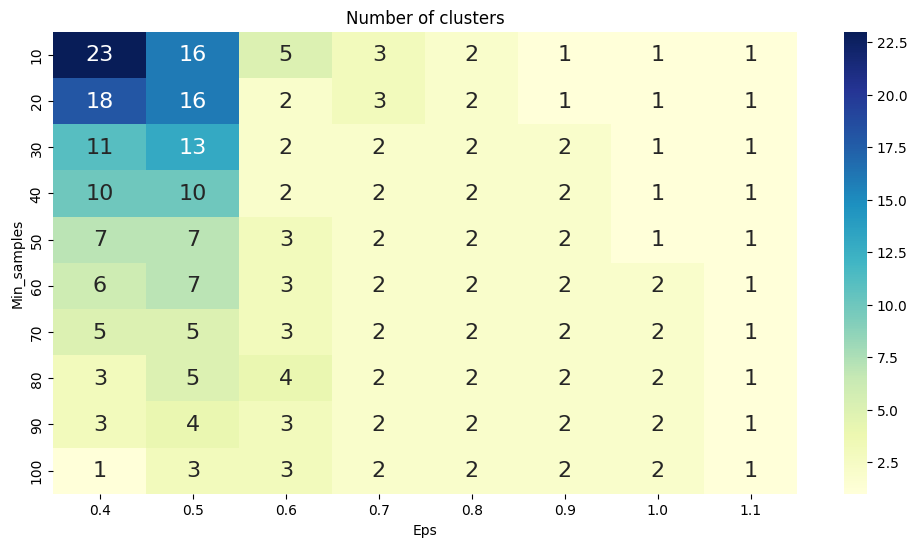

In [59]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters_min_max_scaler

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sn.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

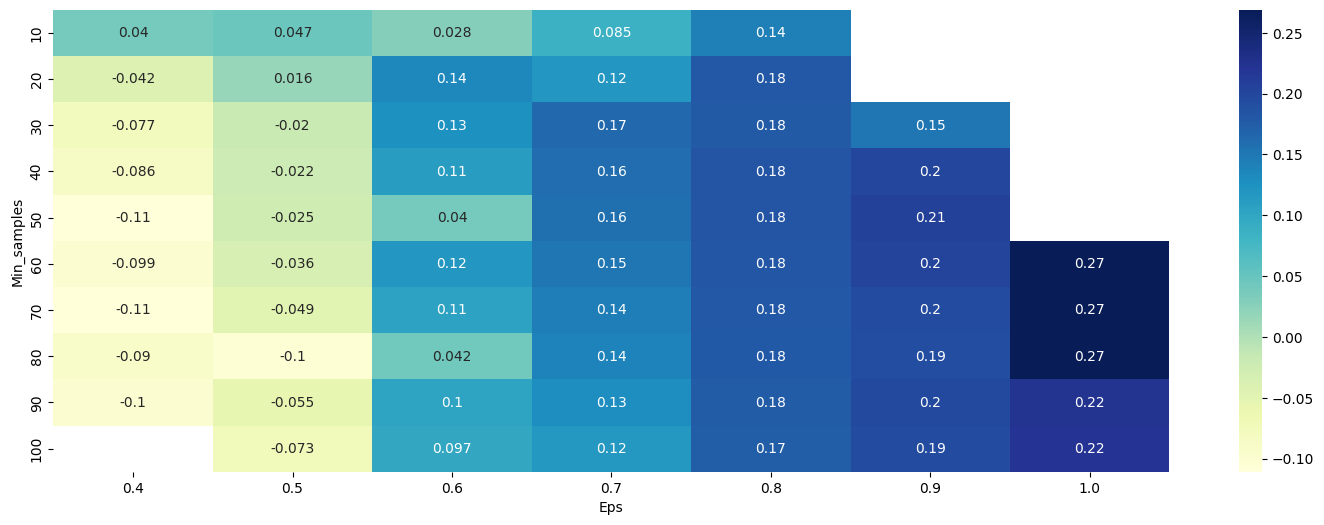

In [60]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score_min_max_scaler

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sn.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

We can take a value of $0.12$ with $min\_samples = 20, eps = 0.7$ and $3$ clusters (including outliers).

In [61]:
DBS_clustering = DBSCAN(eps=0.7, min_samples=20).fit(df_dbscan_min_max_scaled)

df_dbscan_alabama_min_max_clustered = df_clustering_dbscan_alabama.copy()
df_dbscan_alabama_min_max_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [62]:
df_dbscan_alabama_min_max_clustered['Cluster'].value_counts()

 0    2345
-1     159
 1      21
Name: Cluster, dtype: int64

In [63]:
df_dbscan_alabama_std_clustered.head()

,latitude,longitude,avg_age_participants,males_ratio,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio,Cluster
38,30.6432,-87.9076,19.0,1.0,14.7,0.0,0.000000,0.0,0.963825,0.044444,0.0,0.000,0.0,0
145,30.6702,-88.2254,24.0,1.0,14.7,0.0,0.000000,0.0,0.963825,0.022222,0.0,0.000,0.0,0
198,34.7442,-86.5912,36.0,0.0,15.8,0.0,0.000000,0.0,0.744241,0.000000,0.0,0.000,0.0,0
200,32.6208,-85.4922,36.0,1.0,16.8,0.0,0.500000,0.5,0.661205,0.086957,0.0,0.125,0.2,-1
315,32.8708,-85.2010,25.0,1.0,14.7,0.0,0.333333,0.0,0.669318,0.142857,0.0,0.200,0.0,-1


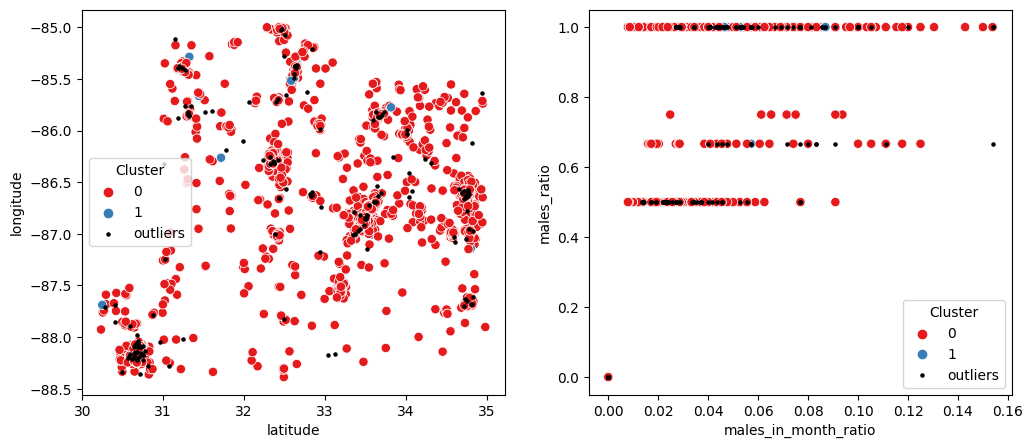

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

outliers = df_dbscan_alabama_min_max_clustered[df_dbscan_alabama_min_max_clustered['Cluster'] == -1]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='latitude', y='longitude',
                data=df_dbscan_alabama_min_max_clustered[df_dbscan_alabama_min_max_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='males_in_month_ratio', y='males_ratio',
                data=df_dbscan_alabama_min_max_clustered[df_dbscan_alabama_min_max_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['latitude'], outliers['longitude'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['males_in_month_ratio'], outliers['males_ratio'], s=5, label='outliers', c="k")

for ax in axes:
    ax.legend()
    ax.get_legend().set_title('Cluster')

plt.show()


## Final Comments
As we have seen, in terms of `Silhouette Score`, we got the best results **without** normalizing the data, with a score of $0.31$ and $2$ clusters (plus outliers). Instead, normalization seems to penalize the final results, getting $0.075$ and $0.083$ with $3$ and $2$ clusters (plus outliers).

Interpretability is still an issue for us, and we will work towards better interpretability for the final delivery.